In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

import psutil
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Class 0", "Class 1"]

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
df = pd.read_csv('spneodeath_clean.csv')
df.describe()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,cd_apgar1,cd_apgar5,newborn_weight,has_congenital_malformation,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
count,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06
mean,1.012354e+00,2.823321e+01,2.090997e+00,4.216266e+00,8.275971e-01,2.395071e-01,4.879380e+00,1.029510e+00,1.567570e+00,3.723224e+00,8.433756e+00,9.474379e+00,3.144856e+03,1.980405e+00,2.271142e+00,1.058415e+00,5.264887e-01,3.196121e-01,3.833380e+01,1.046613e+00,1.208808e+00,3.905048e+00,3.953085e+00,6.127716e-03
std,1.542648e-01,6.687282e+00,1.375772e+00,6.304390e-01,1.104993e+00,5.728221e-01,4.320864e-01,1.747430e-01,4.954134e-01,5.798743e-01,1.212592e+00,8.488450e-01,5.573860e+02,1.458496e-01,1.432523e+00,1.306026e+00,1.030181e+00,6.354840e-01,2.111963e+00,2.206736e-01,4.253384e-01,1.445278e+00,2.616306e+00,7.803955e-02
min,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.300000e+01,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,8.000000e+00,9.000000e+00,2.870000e+03,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,1.000000e+00,2.800000e+01,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,1.000000e+01,3.185000e+03,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00
75%,1.000000e+00,3.300000e+01,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,1.000000e+01,3.490000e+03,2.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00
max,4.000000e+00,6.300000e+01,9.000000e+00,9.000000e+00,1.800000e+01,1.900000e+01,6.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,1.000000e+01,6.605000e+03,9.000000e+00,5.000000e+00,3.900000e+01,8.000000e+01,8.000000e+01,4.600000e+01,3.000000e+00,4.000000e+00,5.000000e+00,1.100000e+01,1.000000e+00


In [ ]:
df.head()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,cd_apgar1,cd_apgar5,newborn_weight,has_congenital_malformation,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
0,1,32,2.0,4.0,1,0,5.0,1.0,2.0,4,9,10,3655,2.0,1.0,1,0,1,39,1.0,1.0,5.0,5.0,0
1,1,40,1.0,3.0,4,1,5.0,1.0,2.0,4,9,9,3540,2.0,4.0,5,4,0,40,2.0,1.0,5.0,7.0,0
2,1,31,2.0,5.0,1,0,5.0,1.0,2.0,4,8,10,3015,2.0,1.0,1,0,1,39,1.0,1.0,2.0,5.0,0
3,1,19,5.0,4.0,2,0,5.0,1.0,1.0,4,8,9,3220,2.0,4.0,2,2,0,39,1.0,1.0,5.0,4.0,0
4,1,33,1.0,4.0,5,0,5.0,1.0,1.0,2,9,10,3210,2.0,2.0,5,5,0,40,1.0,2.0,2.0,3.0,0


In [ ]:
df_death = df[df.neonatal_death == 1]
df_alive = df[df.neonatal_death == 0]
labels_civil = ['Single', 'Married', 'Widowed', 'Divorced', 'Stable Union']

In [ ]:
values_death = df_death.groupby('neonatal_death')['neonatal_death'].count()
n_samples_death = df_death.shape[0]
values_alive = df_alive.groupby('neonatal_death')['neonatal_death'].count()
n_samples_alive = df_alive.shape[0]
freq_alive_civil = df_alive['tp_marital_status'].value_counts().sort_index() / len(df_alive)
freq_death_civil = df_death['tp_marital_status'].value_counts().sort_index() / len(df_death)

In [ ]:
#fig = plt.figure(figsize=(12, 12))

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

##Alive Data
axis1 = plt.subplot(221)
axis1.bar(labels_civil, freq_alive_civil*100, alpha=0.5,color='blue',edgecolor='black',width=0.5)
#axis1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_alive)))
axis1.grid(False)

_ = axis1.set_ylim(0,50)
_ = axis1.set_yticklabels(map('{:.1f}%'.format, axis1.yaxis.get_majorticklocs()), fontsize=15)
_ = axis1.set_xticklabels(labels_civil, fontsize=15,rotation=80)



##Death Data
axis2 = plt.subplot(222)
axis2.bar(labels_civil,freq_death_civil*100, alpha=0.5,color='red',edgecolor='black',width=0.5)
#axis2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_death)))
axis2.grid(False)

_ = axis2.set_ylim(0,50)
_ = axis2.set_yticklabels(map('{:.1f}%'.format, axis2.yaxis.get_majorticklocs()), fontsize=15)
_ = axis2.set_xticklabels(labels_civil, fontsize=15, rotation=80)



axis1.set_title('Alive: \n {:,} samples'.format(n_samples_alive), fontsize = 15)
axis2.set_title('Death: \n {:,} samples'.format(n_samples_death), fontsize = 15)

fig.suptitle('', x=0.5, y=1, fontsize = 16)
#axis1.set_ylabel('',fontsize=16)
fig.tight_layout()
fig.text(0.45,0.45, '',fontsize=16)

Class 0: 1269322
Class 1: 7826
Proportion: 162.19 : 1


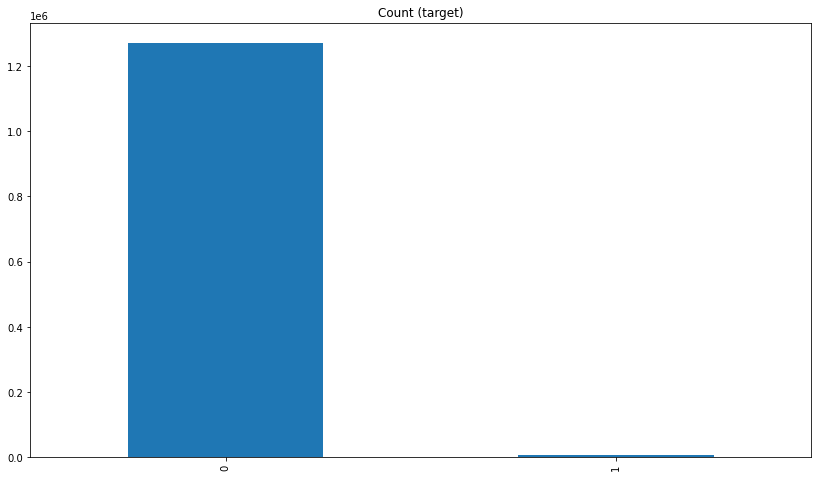

In [ ]:
target_count = df.neonatal_death.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:

#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["neonatal_death"]]
# Store the variable we are predicting 
target = "neonatal_death"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(1277148, 23)
(1277148,)


In [ ]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

X_res.shape,y_res.shape

((15652, 23), (15652,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1269322, 1: 7826})
Resampled dataset shape Counter({0: 7826, 1: 7826})


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(X, y)
import tensorflow as tf

from tensorflow import keras
# y_sm.value_counts()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=3)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

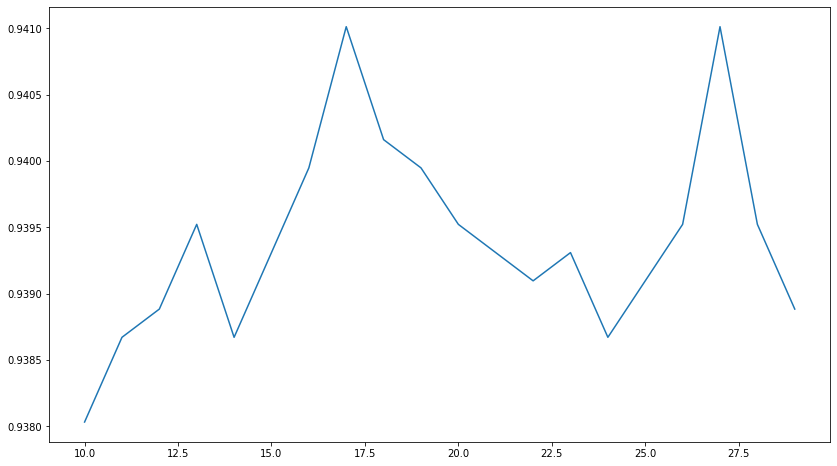

XGBClassifier(max_depth=12, n_estimators=10, subsample=0.7)

In [ ]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7, eval_metric='mlogloss')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(X_train,y_train)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[2180  191]
 [  96 2229]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2371
           1       0.92      0.96      0.94      2325

    accuracy                           0.94      4696
   macro avg       0.94      0.94      0.94      4696
weighted avg       0.94      0.94      0.94      4696



Text(0.5, 0, 'Xgboost Permutation Importance')

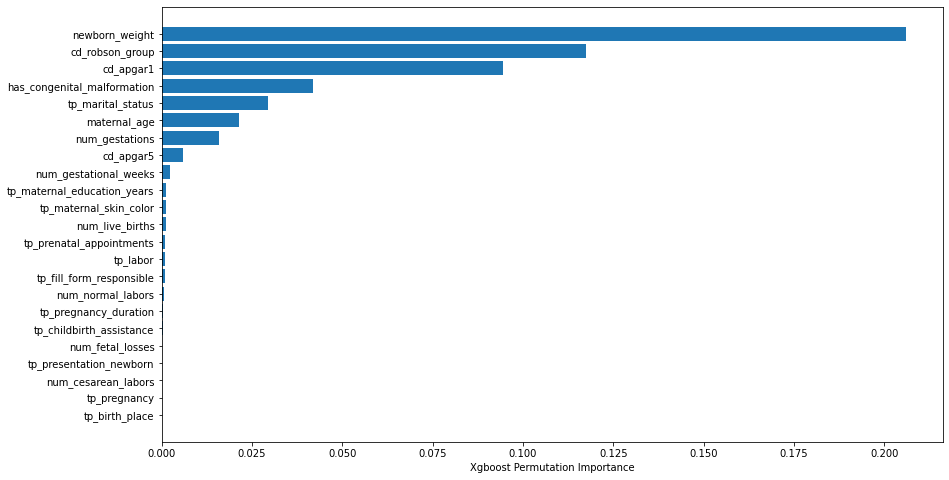

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier, X_res, y_res)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Xgboost Permutation Importance")